In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000328.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

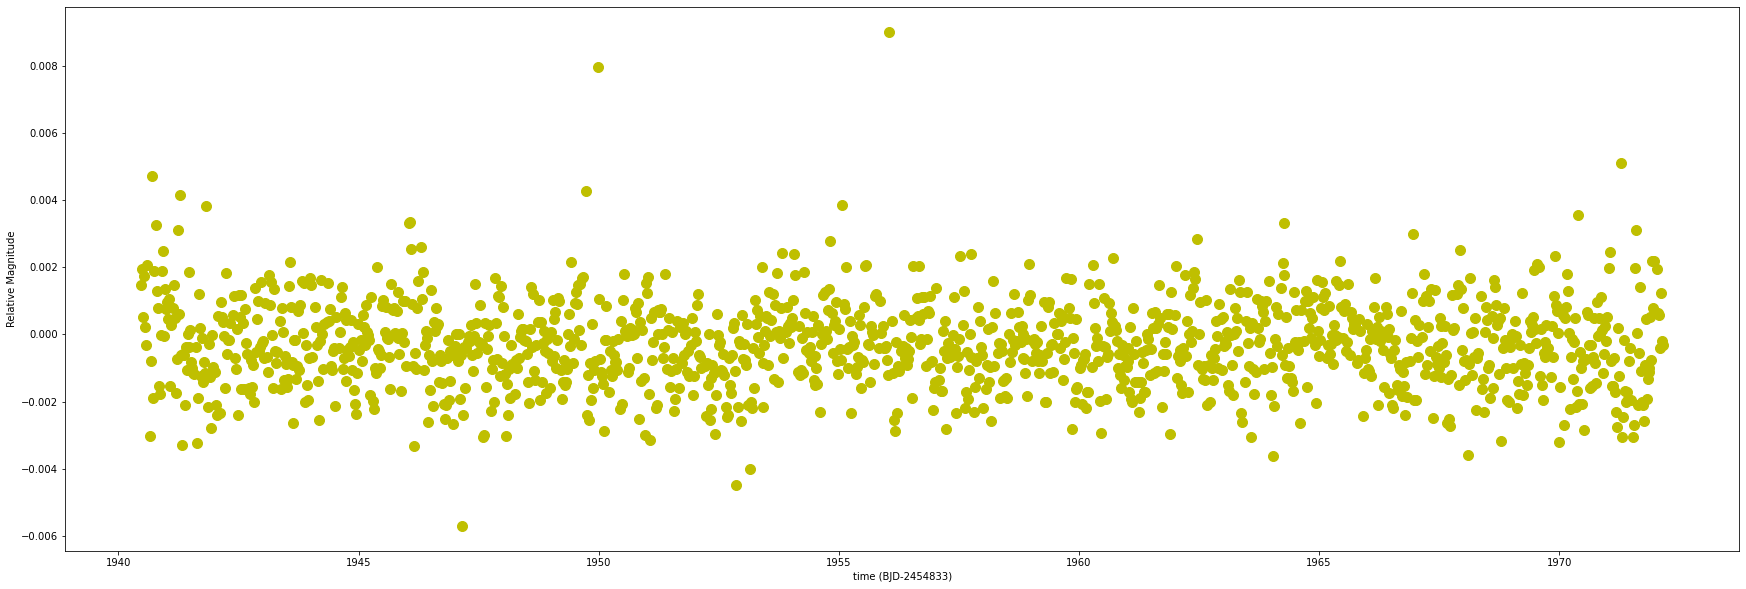

In [3]:
plt.figure(figsize=(30,10))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000328')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200815 13:36:04 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200815 13:36:04 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200815 13:36:06 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:36:06 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200815 13:36:10 nonphysical:216] spline fit done. nknots = 13,  chisq = 13324153.02796, reduced chisq = 9884.38652
[I 200815 13:36:10 png:696] plotting phased LC with period 0.245656, epoch 1951.04071
[I 200815 13:36:10 nonphysical:216] spline fit done. nknots = 13,  chisq = 13440613.78948, reduced chisq = 9970.78174
[I 200815 13:36:10 png:696] plotting phased LC with period 0.122828, epoch 1951.04071
[I 200815 13:36:10 nonphysical:216] spline fit done. nknots = 13,  chisq = 13272307.56997, reduced chisq = 9845.92550
[I 200815 13:36:10 png:696] plotting phased LC with period 0.491311, epoch 1961.60389
[I 200815 13:36:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 13406082.99027, reduced chisq = 9945.16542
[I 200815 13:36:11 png:696] plotting phased LC with period 0.125553, epoch 1940.47757
[I 200815 13:36:11 nonphysical:216] spline fit done. nknots = 13,  chisq = 13328307.01001, reduced chisq = 9887.46811
[I 200815 13:36:11 png:696] plotting phased LC with period 8.33935

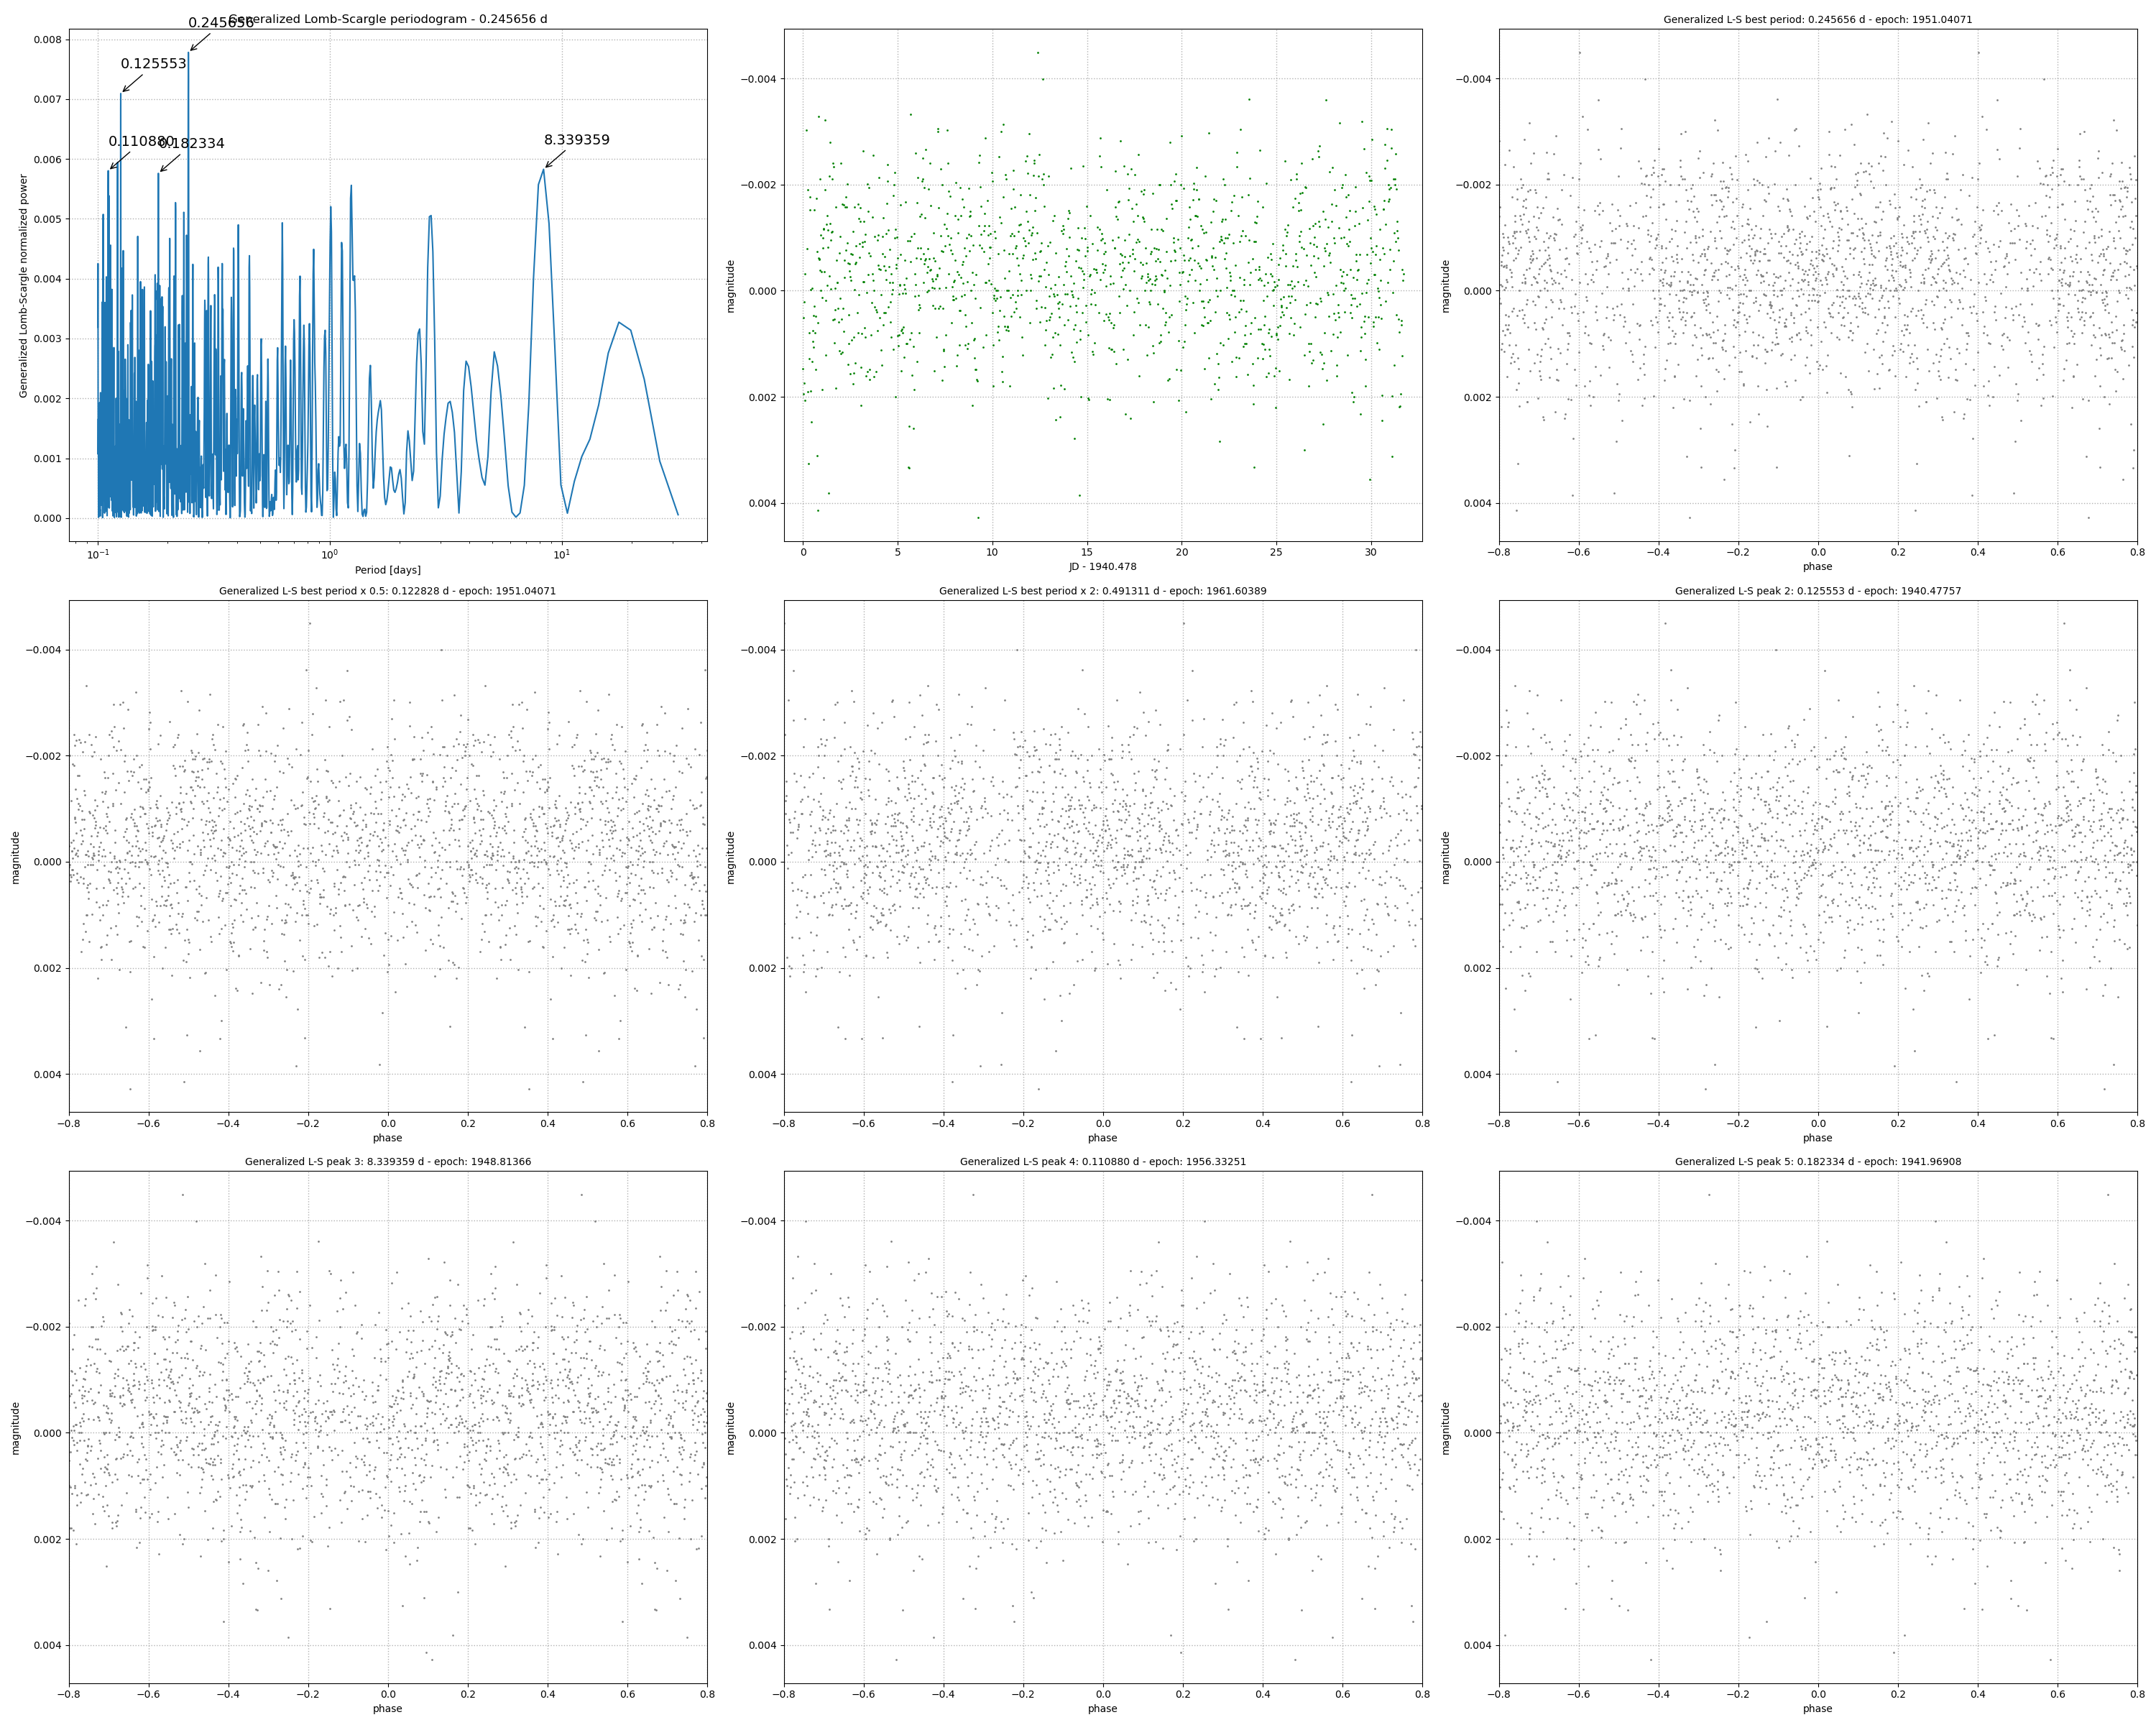

In [8]:
from IPython.display import Image
Image('0000328-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.24565553666666554,
 'bestlspval': 0.007780237340876122,
 'nbestpeaks': 5,
 'nbestlspvals': [0.007780237340876122,
  0.007093109880861362,
  0.005827465998133642,
  0.005802897011825212,
  0.005759343595193161],
 'nbestperiods': [0.24565553666666554,
  0.12555294861331165,
  8.339359007894702,
  0.11088021074177698,
  0.18233351110471724],
 'lspvals': array([5.54265568e-05, 9.51977558e-04, 2.32148385e-03, ...,
        4.25071439e-03, 3.92775535e-03, 3.18938702e-03]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758221, ..., 62.73358058,
        62.77323518, 62.81288979]),
 'periods': array([31.68956423, 26.40797019, 22.63540302, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.24565553666666554, 0.12555294861331165, 8.339359007894702, 0.11088021074177698, 0.18233351110471724] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200815 13:36:51 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200815 13:36:51 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032433059782e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200815 13:36:51 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200815 13:36:51 abls:969] new minfreq: 0.06311225946447825, maxfreq: 10.0
[I 200815 13:36:51 abls:980] using 6 workers...
[I 200815 13:36:51 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200815 13:36:51 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200815 13:36:51 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200815 13:36:51 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200815 13:36:51 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200815 13:36:51 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200815 13:37:05 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200815 13:37:09 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200815 13:37:09 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200815 13:37:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13445133.65384, reduced chisq = 9974.13476
[I 200815 13:37:14 png:696] plotting phased LC with period 10.563188, epoch 1951.04071
[I 200815 13:37:14 nonphysical:216] spline fit done. nknots = 13,  chisq = 13372068.06407, reduced chisq = 9919.93180
[I 200815 13:37:14 png:696] plotting phased LC with period 5.281594, epoch 1951.04071
[I 200815 13:37:15 nonphysical:216] spline fit done. nknots = 13,  chisq = 13347119.85469, reduced chisq = 9901.42422
[I 200815 13:37:15 png:696] plotting phased LC with period 21.126376, epoch 1940.47757
[I 200815 13:37:15 nonphysical:216] spline fit done. nknots = 13,  chisq = 13371350.52580, reduced chisq = 9926.76357
[I 200815 13:37:15 png:696] plotting phased LC with period 5.281594, epoch 1961.60389
[I 200815 13:37:15 nonphysical:216] spline fit done. nknots = 13,  chisq = 13385920.11589, reduced chisq = 9930.20780
[I 200815 13:37:15 png:696] plotting phased LC with period 19.80

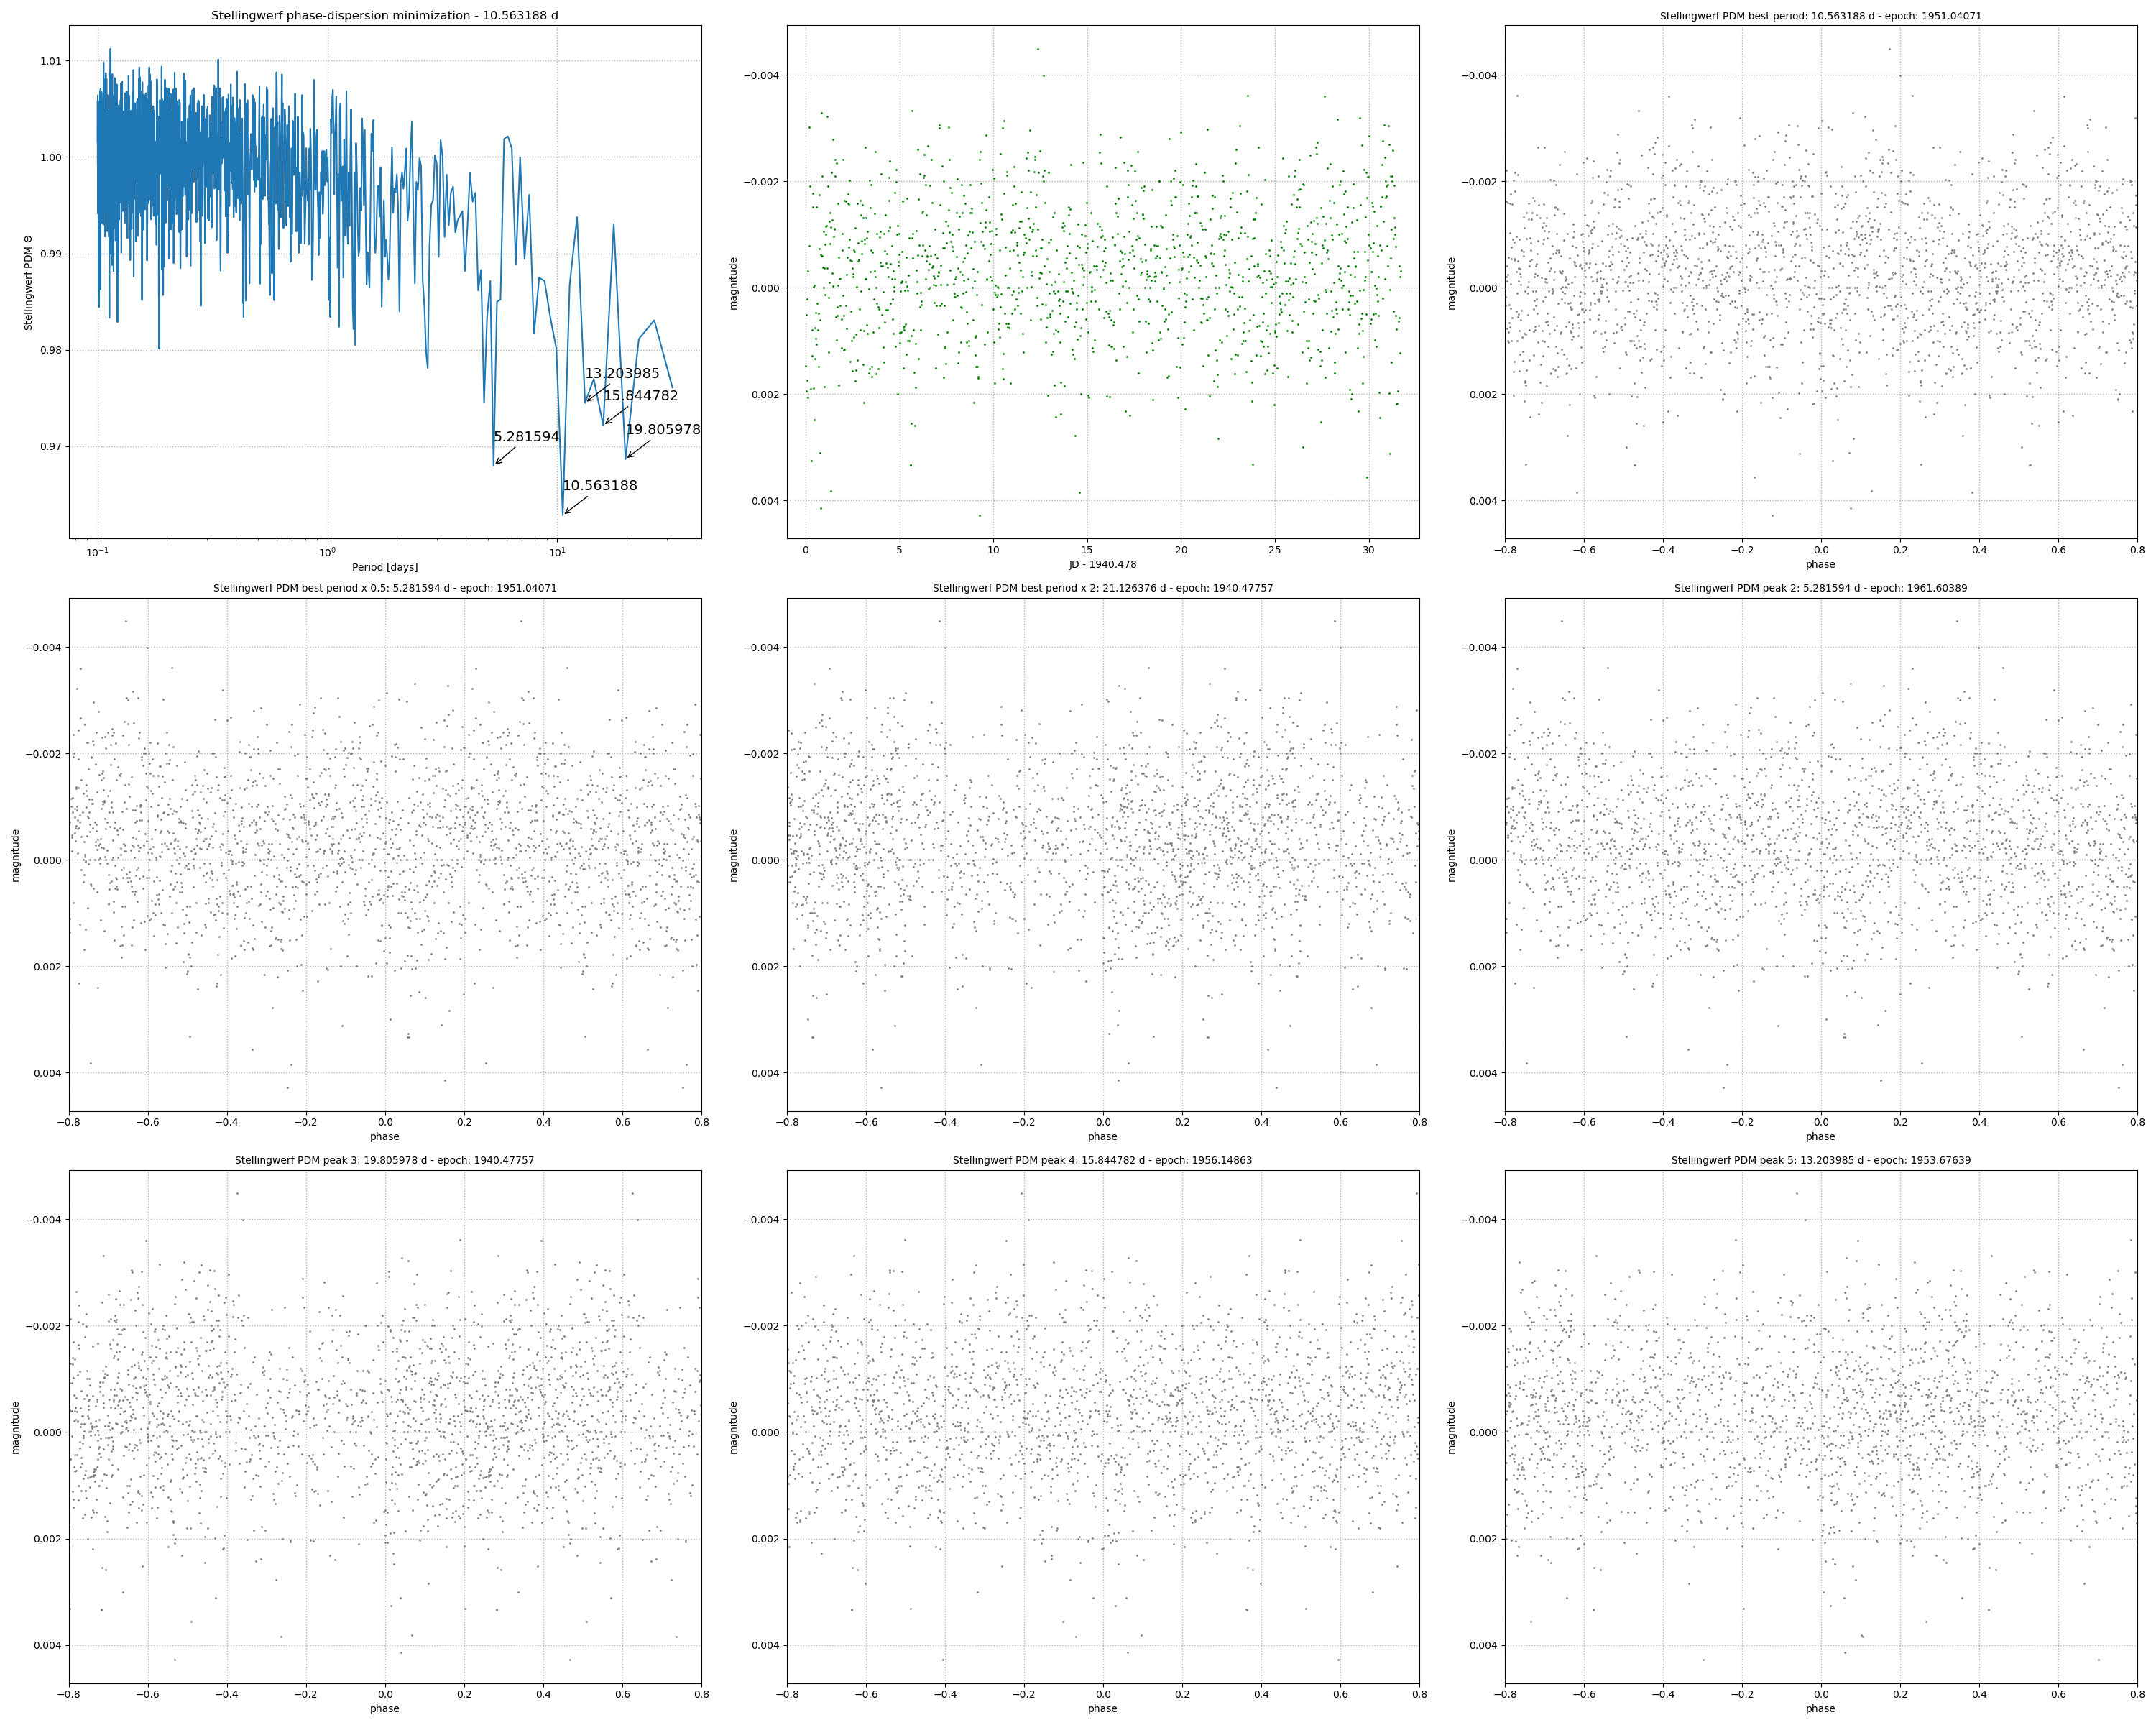

In [15]:
Image('0000328-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [10.563188076666618, 5.28159403833331, 19.805977643749912, 15.84478211499993, 13.203985095833277] (days)
